Analyzing Air Quality Index (AQI) Trends in a City

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("d4_air.csv",encoding='latin1')
print(data.index)


RangeIndex(start=0, stop=49005, step=1)


In [3]:
sns.set(style="ticks", rc={'figure.figsize': (20, 15)})

In [4]:
print(data.isnull().sum())
print(data.shape)
data.info()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64
(49005, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       326

In [5]:
print(data.isnull().sum())
data.tail()


stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
49000,NaN,23-03-05,Chandigarh,Chandigarh,NaN,Residential and others,6.0,15.0,47.0,125.0,Punjab Eng College,NaN,2005-03-23
49001,NaN,25-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,12.0,54.0,161.0,Punjab Eng College,NaN,2005-03-25
49002,NaN,28-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,10.0,116.0,196.0,Punjab Eng College,NaN,2005-03-28
49003,NaN,30-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,9.0,38.0,154.0,Punjab Eng College,NaN,2005-03-30
49004,NaN,30-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,9.0,38.0,154.0,Punjab Eng College,NaN,2005-03-30


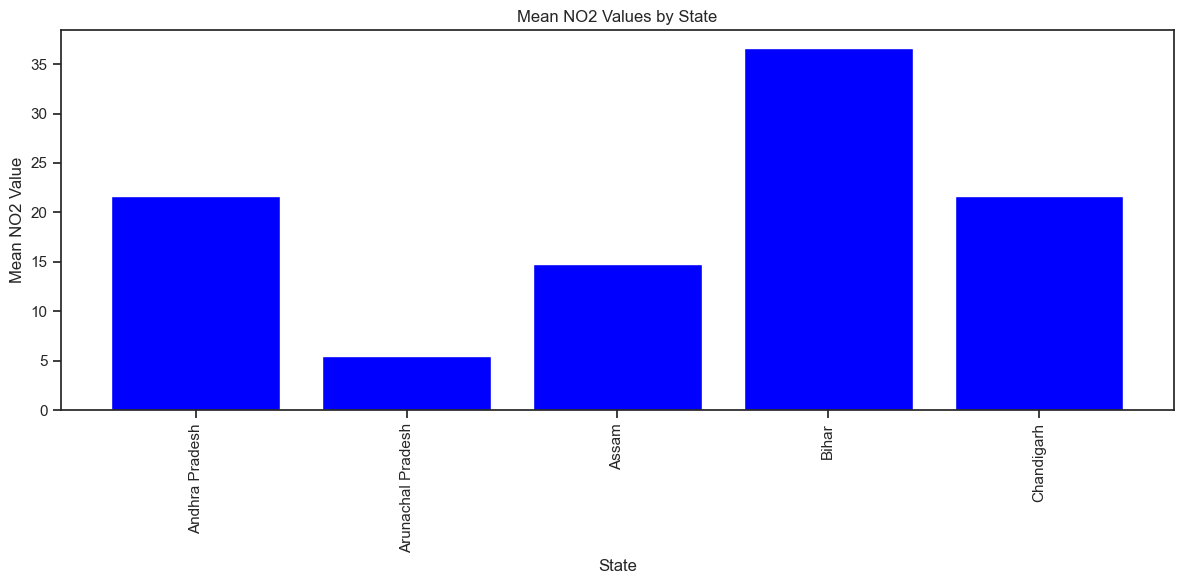

In [6]:
state_means = data.groupby('state')['no2'].mean()

x_axis = state_means.index
y_axis = state_means.values

plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean NO2 Value')
plt.title('Mean NO2 Values by State')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

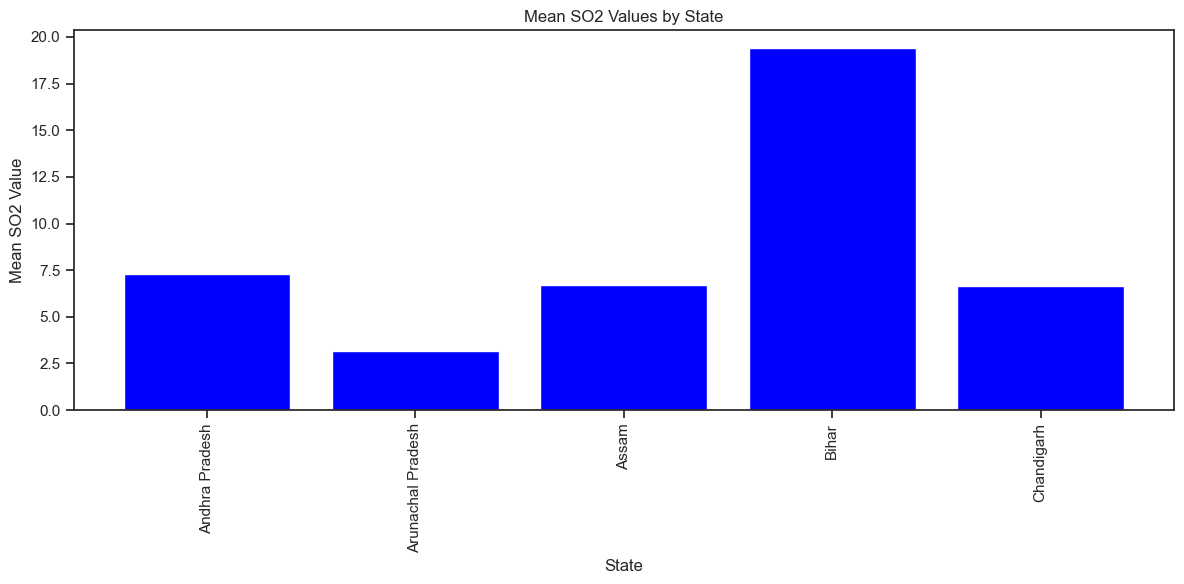

In [7]:
state_means = data.groupby('state')['so2'].mean()

x_axis = state_means.index
y_axis = state_means.values

plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean SO2 Value')
plt.title('Mean SO2 Values by State')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

Dataset Preview:
    stn_code       sampling_date           state   location agency  \
0     150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1     151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2     152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3     150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4     151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    Na

C:\Users\Shruti\AppData\Local\Temp\ipykernel_26676\3533731430.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


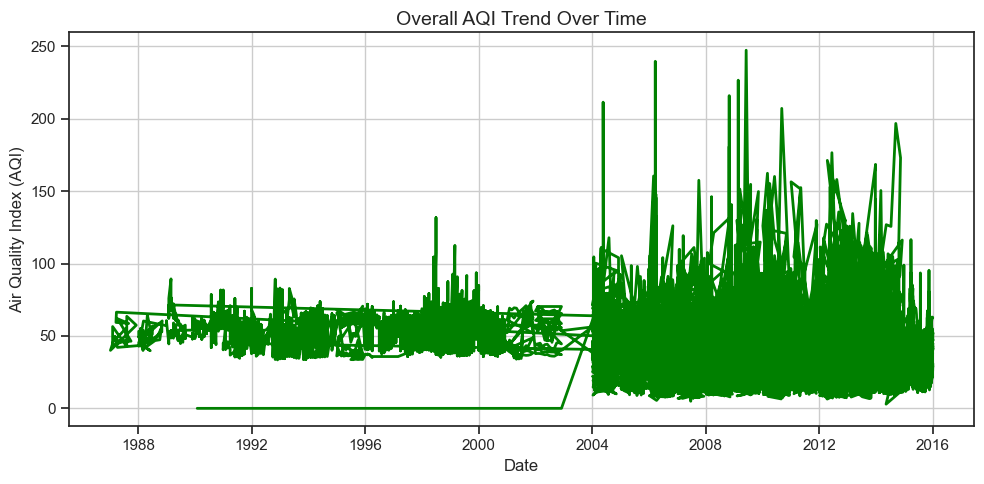

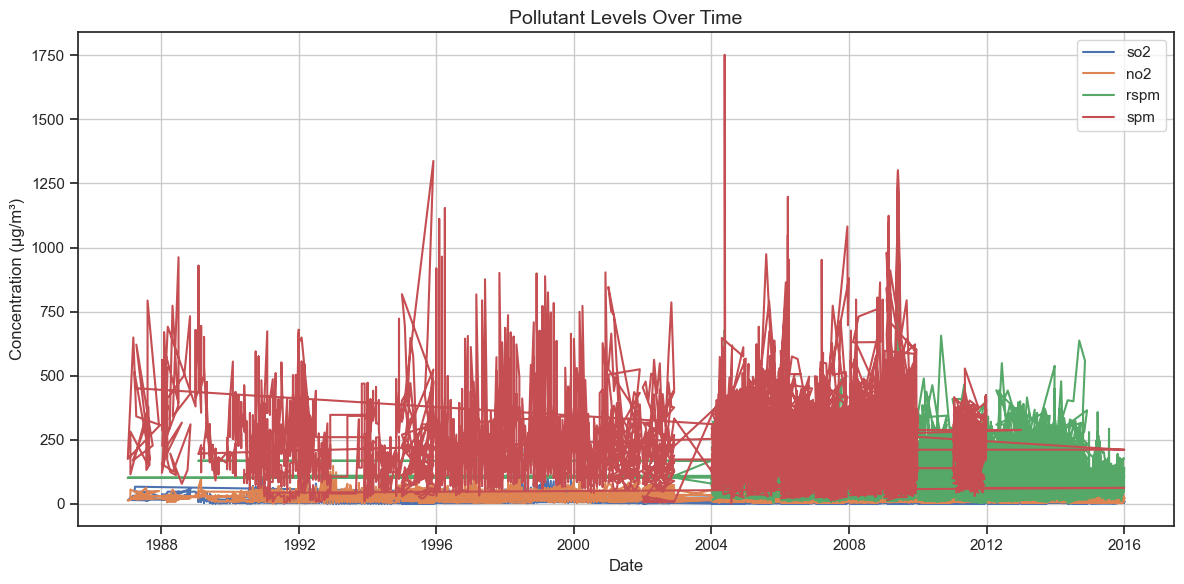

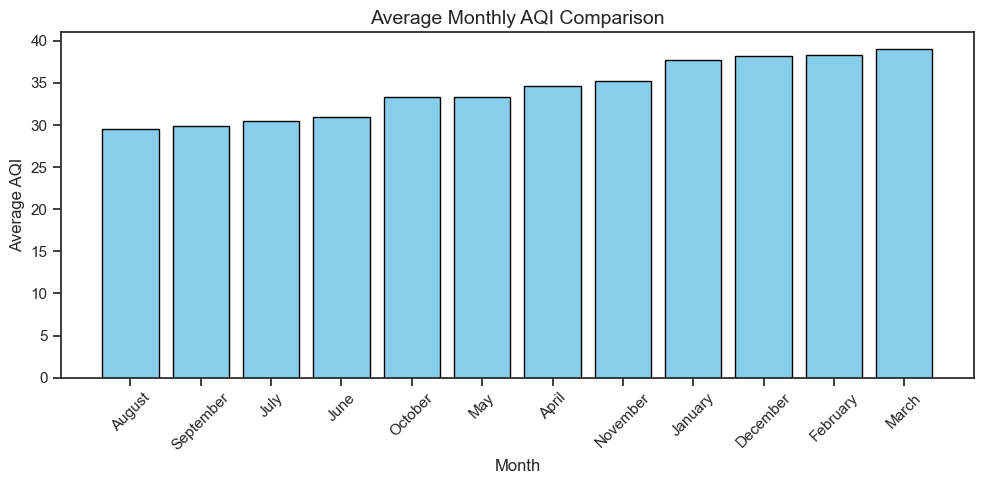

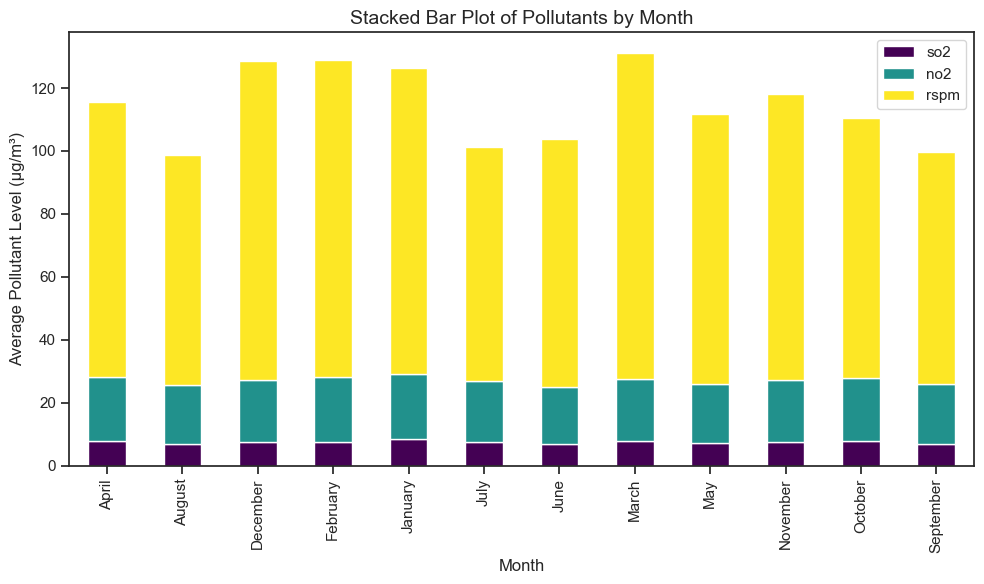

C:\Users\Shruti\AppData\Local\Temp\ipykernel_26676\3533731430.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['AQI'], df['so2'], df['no2'], df['rspm']], labels=['AQI', 'SO2', 'NO2', 'RSPM'])


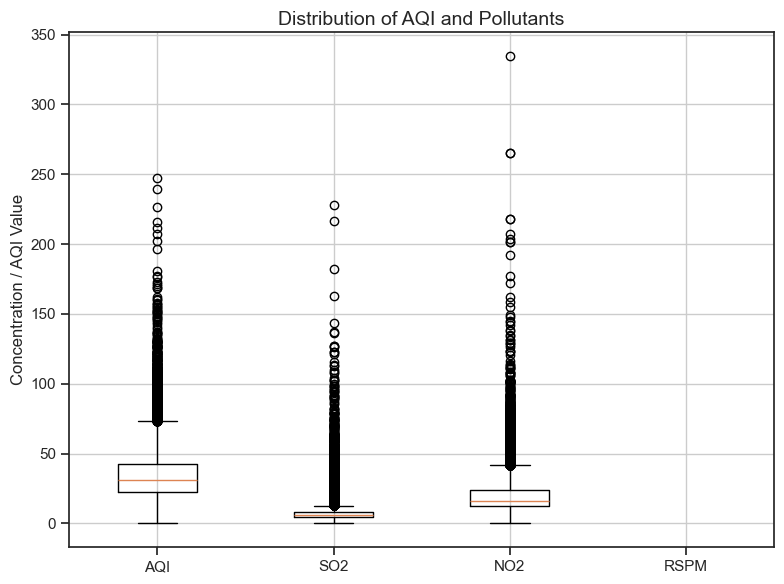

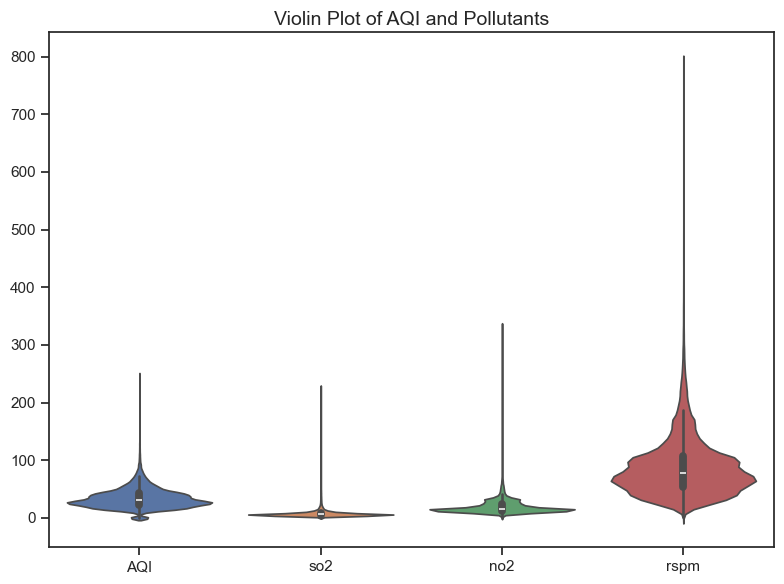

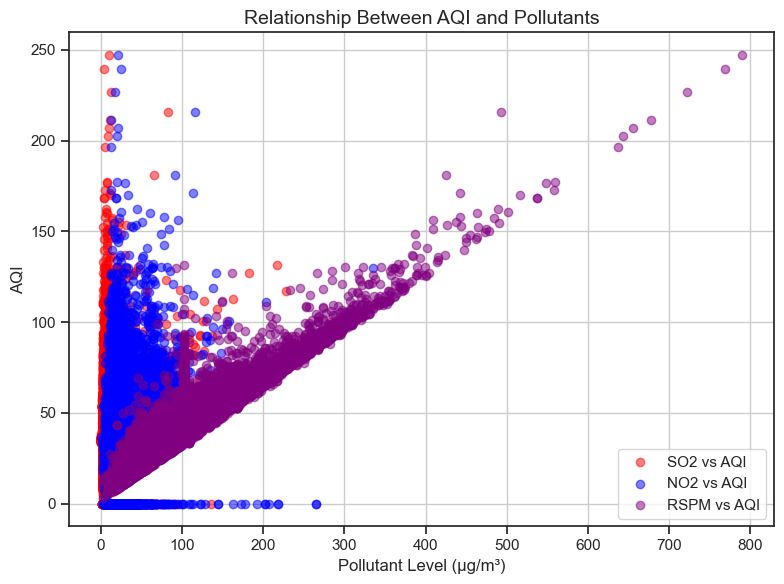

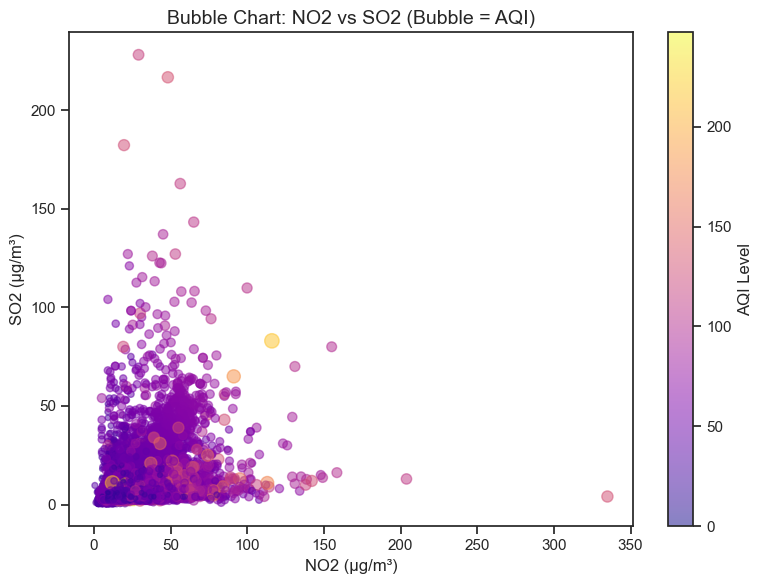

In [9]:
# -------------------------------------------------------------
# Project: Analyzing Air Quality Index (AQI) Trends in a City
# Dataset: City_Air_Quality.csv
# Library: matplotlib, pandas
# -------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Import the dataset
df = pd.read_csv("d4_air.csv")

# 2️⃣ Explore the dataset
print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

# 3️⃣ Identify relevant variables (date, pollutants, AQI)
# The dataset has 'date', 'so2', 'no2', 'rspm', 'spm', etc.
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# 4️⃣ Handle missing values (fill forward for continuity)
df = df.fillna(method='ffill')

# ⚙️ Optional: If AQI not present, approximate it (just for visualization)
# Simple weighted formula (example assumption)
df['AQI'] = (0.4 * df['so2'] + 0.3 * df['no2'] + 0.3 * df['rspm']).fillna(0)

# 5️⃣ Line Plot – Overall AQI Trend Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['AQI'], color='green', linewidth=2)
plt.title("Overall AQI Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Air Quality Index (AQI)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6️⃣ Line Plots – Individual Pollutant Levels (SO2, NO2, RSPM, SPM)
pollutants = ['so2', 'no2', 'rspm', 'spm']
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(df['date'], df[pollutant], label=pollutant)
plt.title("Pollutant Levels Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Concentration (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7️⃣ Bar Plot – Comparing Average AQI across Months
df['Month'] = df['date'].dt.month_name()
monthly_aqi = df.groupby('Month')['AQI'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.bar(monthly_aqi.index, monthly_aqi.values, color='skyblue', edgecolor='black')
plt.title("Average Monthly AQI Comparison", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8️⃣ Stacked Bar Plot – Comparing SO2, NO2, RSPM monthly
monthly_pollutants = df.groupby('Month')[['so2', 'no2', 'rspm']].mean()
monthly_pollutants.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Stacked Bar Plot of Pollutants by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Pollutant Level (µg/m³)")
plt.tight_layout()
plt.show()

# 9️⃣ Box Plot – Distribution of AQI and Pollutants
plt.figure(figsize=(8, 6))
plt.boxplot([df['AQI'], df['so2'], df['no2'], df['rspm']], labels=['AQI', 'SO2', 'NO2', 'RSPM'])
plt.title("Distribution of AQI and Pollutants", fontsize=14)
plt.ylabel("Concentration / AQI Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔟 Violin Plot (optional, if you have seaborn)
try:
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df[['AQI', 'so2', 'no2', 'rspm']])
    plt.title("Violin Plot of AQI and Pollutants", fontsize=14)
    plt.tight_layout()
    plt.show()
except:
    print("Seaborn not installed — skipping violin plot.")

# 1️⃣1️⃣ Scatter Plot – Relationship Between AQI and Pollutants
plt.figure(figsize=(8, 6))
plt.scatter(df['so2'], df['AQI'], color='red', alpha=0.5, label='SO2 vs AQI')
plt.scatter(df['no2'], df['AQI'], color='blue', alpha=0.5, label='NO2 vs AQI')
plt.scatter(df['rspm'], df['AQI'], color='purple', alpha=0.5, label='RSPM vs AQI')
plt.title("Relationship Between AQI and Pollutants", fontsize=14)
plt.xlabel("Pollutant Level (µg/m³)")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1️⃣2️⃣ Bubble Chart – NO2 vs SO2 with AQI as bubble size
plt.figure(figsize=(8, 6))
plt.scatter(df['no2'], df['so2'], s=df['AQI']*0.5, alpha=0.5, c=df['AQI'], cmap='plasma')
plt.colorbar(label='AQI Level')
plt.title("Bubble Chart: NO2 vs SO2 (Bubble = AQI)", fontsize=14)
plt.xlabel("NO2 (µg/m³)")
plt.ylabel("SO2 (µg/m³)")
plt.tight_layout()
plt.show()

